# ANTES DE FAZER A CONCLUSÃO ESTOU ENVIANDO PARA ANALISE FINAL

Olá, Matheus!

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

## Preparação dos dados

In [1]:
# Importar os módulos necessários
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Abrir os arquivos de dados


In [2]:
df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")
dataframes = [df_train, df_test, df_full]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Verificação da exatidão dos cálculos da quantidade retirada para a característica rougher.output.recovery e cálculo do EAM

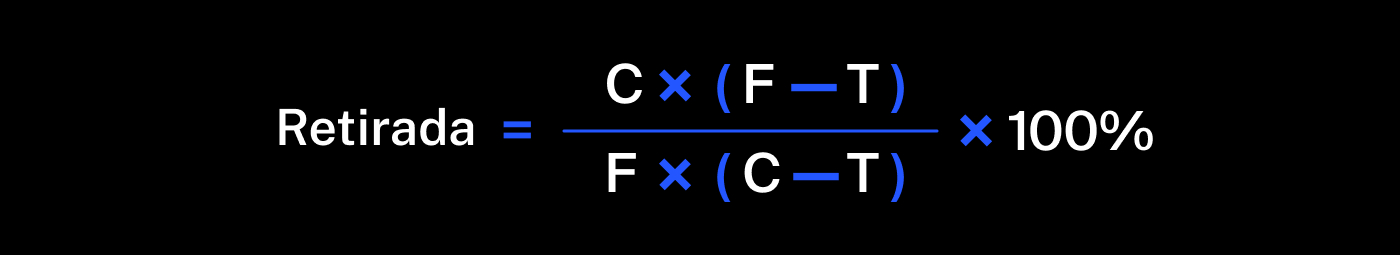

In [3]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

retirada = (c * (f - t)) * 100 / (f * (c - t))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [4]:
# Cálculo do EAM entre os cálculos e os valores das características rougher.output.recovery
error = (retirada - df_train['rougher.output.recovery']).abs().mean()
print("Mean absolute error:", error)

Mean absolute error: 1.0724115653039479e-14


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


O calculo de 'retirada' é correto.

### Análise das características não disponíveis no conjunto de teste

In [5]:
unavailable_features = [col for col in df_full.columns if col not in df_test.columns]
print("Características não disponíveis no conjunto de teste:", unavailable_features)

Características não disponíveis no conjunto de teste: ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.ta

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Parabéns pelo uso de list comprehension 
</div>


### Pré-processamento dos dados

In [6]:
percentage_null = df_full.isnull().mean().mean()*100
print(percentage_null)

1.851295253940207


Os dados faltantantes representam quase 2% do dataframe, quantidade que eu acho aceitavel de ser retirada mas irei substituir estes pelos valores da média da coluna.

In [7]:
# FULL
# Verifica duplicatas
print(f'Duplicatas {df_full.duplicated().sum()}')
# Preenchimento de valores ausentes com a média das colunas
df_full = df_full.fillna(df_full.mean())
df_full.isna().sum().max()
assert df_full.isna().sum().max() == 0

# TRAIN
# Verifica duplicatas
print(f'Duplicatas {df_train.duplicated().sum()}')
# Preenchimento de valores ausentes com a média das colunas
df_train = df_train.fillna(df_full.mean())
df_train.isna().sum().max()
assert df_full.isna().sum().max() == 0

# TEST
# Verifica duplicatas
print(f'Duplicatas {df_test.duplicated().sum()}')
# Preenchimento de valores ausentes com a média das colunas
df_test = df_test.fillna(df_full.mean())
df_test.isna().sum().max()
assert df_full.isna().sum().max() == 0

Duplicatas 0
Duplicatas 0
Duplicatas 0


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

* Apenas o resultado da última linha foi exibidio. Vocẽ pode usar print() nas demais ou usar assert (ex: assert df_full.duplicated().sum() == 0).
    
* Por que vai imputar em vez de descartar? Você não justificou    
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Análise dos dados


### Observação da mudança da concentração de metais (Au, Ag, Pb) dependendo do estágio de purificação


In [8]:
#ADD 1 e 3

# Observação da mudança da concentração de metais (Au, Ag, Pb) dependendo do estágio de purificação

first_purification_au = df_full["primary_cleaner.output.concentrate_au"]
final_purification_au = df_full["final.output.concentrate_au"]

first_purification_ag = df_full["primary_cleaner.output.concentrate_ag"]
final_purification_ag = df_full["final.output.concentrate_ag"]

first_purification_pb = df_full["primary_cleaner.output.concentrate_pb"]
final_purification_pb = df_full["final.output.concentrate_pb"]

In [9]:
purification_data = {
    "Au": {
        "first": first_purification_au,
        "final": final_purification_au
    },
    "Ag": {
        "first": first_purification_ag,
        "final": final_purification_ag
    },
    "Pb": {
        "first": first_purification_pb,
        "final": final_purification_pb
    }
}

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


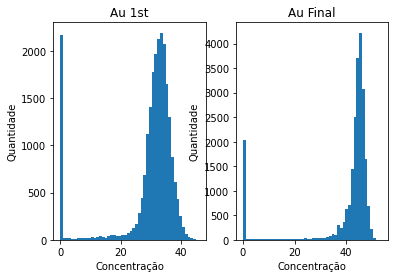

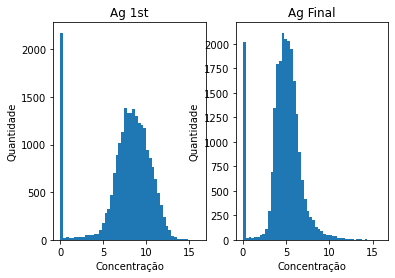

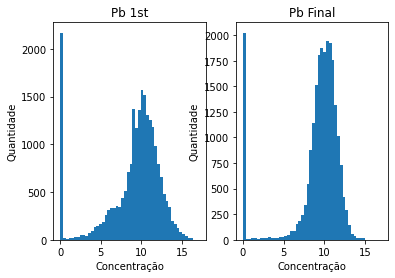

In [10]:
for element, data in purification_data.items():
    fig, axs = plt.subplots(1, 2)
    axs[0].hist(data["first"], bins=50)
    axs[1].hist(data["final"], bins=50)
    axs[0].set_title(f"{element} 1st")
    axs[1].set_title(f"{element} Final")
    axs[0].set_xlabel("Concentração")
    axs[1].set_xlabel("Concentração")
    axs[0].set_ylabel("Quantidade")
    axs[1].set_ylabel("Quantidade")
    plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas sem conclusões
</div>


Fica claro que a concentração de Ag aumenta bastante no estagio final da purificação, enquanto a concentração de Ag diminui consideravelmente e a de Pb praticamenten não se altera.

### Comparação das distribuições de tamanho de partícula de minério nos conjuntos de treinamento e teste


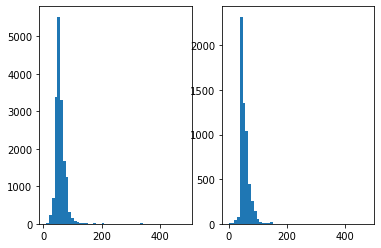

In [11]:
# AU
fig, axs = plt.subplots(1, 2)
axs[0].hist(df_train["rougher.input.feed_size"], bins=50);
axs[1].hist(df_test["rougher.input.feed_size"], bins=50);

As distribuições são bem parecidas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto mas sem conclusões
</div>


### Análise de anomalias nas concentrações totais de substâncias em diferentes estágios (minério bruto, concentrado bruto e concentrado final) e eliminação de anomalias


<AxesSubplot:>

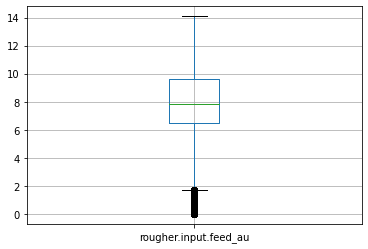

In [12]:
df_full.boxplot("rougher.input.feed_au")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto mas sem conclusões
</div>


In [13]:
# Cálculando os limites para valores atípicos para filtrar o dataframe posteriormente.
# Limite inferior para valores atípicos
Q1 = df_full["rougher.input.feed_au"].quantile(.25)
# Limite superior para valores atípicos
Q3 = df_full["rougher.input.feed_au"].quantile(.75)
#Limites Outliers
IQR = Q3 - Q1
outlier_lower_bound1 = Q1 - 1.5*IQR
outlier_upper_bound1 = Q3 + 1.5*IQR

print(f"Outlier_lower: {outlier_lower_bound1}")
print(f"Outlier_upper: {outlier_upper_bound1}")

Outlier_lower: 1.7406863955822036
Outlier_upper: 14.411096603483672


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


<AxesSubplot:>

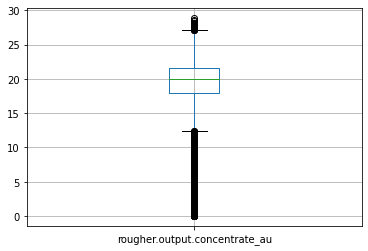

In [14]:
df_full.boxplot("rougher.output.concentrate_au")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [15]:
# Cálculando os limites para valores atípicos para filtrar o dataframe posteriormente.
# Limite inferior para valores atípicos
Q1 = df_full["rougher.output.concentrate_au"].quantile(.25)
Q1
# Limite superior para valores atípicos
Q3 = df_full["rougher.output.concentrate_au"].quantile(.75)
Q3
#Limites Outliers
IQR = Q3 - Q1
outlier_lower_bound2 = Q1 - 1.5*IQR
outlier_upper_bound2 = Q3 + 1.5*IQR

print(f"Outlier_lower: {outlier_lower_bound2}")
print(f"Outlier_upper: {outlier_upper_bound2}")

Outlier_lower: 12.365810408739987
Outlier_upper: 27.06908452685599


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


<AxesSubplot:>

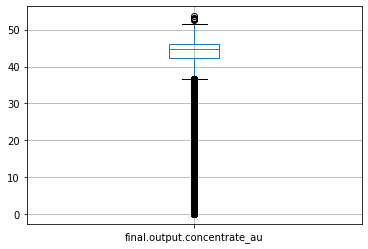

In [16]:
df_full.boxplot("final.output.concentrate_au")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [17]:
# Cálculando os limites para valores atípicos para filtrar o dataframe posteriormente.
# Limite inferior para valores atípicos
Q1 = df_full["final.output.concentrate_au"].quantile(.25)
Q1
# Limite superior para valores atípicos
Q3 = df_full["final.output.concentrate_au"].quantile(.75)
Q3
#Limites Outliers
IQR = Q3 - Q1
outlier_lower_bound3 = Q1 - 1.5*IQR
outlier_upper_bound3 = Q3 + 1.5*IQR

print(f"Outlier_lower: {outlier_lower_bound3}")
print(f"Outlier_upper: {outlier_upper_bound3}")

Outlier_lower: 36.670468995334105
Outlier_upper: 51.76837774102255


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [18]:
df_full = df_full[(df_full["rougher.input.feed_au"] > outlier_lower_bound1) &
                 (df_full["rougher.input.feed_au"] < outlier_upper_bound1)]

In [19]:
df_full = df_full[(df_full["rougher.output.concentrate_au"] > outlier_lower_bound2) &
                 (df_full["rougher.output.concentrate_au"] < outlier_upper_bound2)]

In [20]:
df_full = df_full[(df_full["final.output.concentrate_au"] > outlier_lower_bound3) &
                 (df_full["final.output.concentrate_au"] < outlier_upper_bound3)]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. É importante tratar outliers
</div>


## Construção do modelo

<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sugiro você buscar apoio de um tutor para facilitar  seu processo, pois nossa interação textual é limitada. Vou dar alguams dicas:
* Você precisa considerar no modelo apenas as colunas que estão tanto no treino e teste (ver seção 1.3  Análise das características não disponíveis no conjunto de teste)
    
</div>


In [21]:
#TRAIN

#Setando os dados a serem dropados para features_train
targets_date = ['rougher.output.recovery', 'final.output.recovery', 'date']
to_drop = unavailable_features + targets_date

#Features
features_train = df_train.drop(to_drop, axis=1).reset_index(drop=True)

#Target
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

In [22]:
# Separando o df_train em features e target
features_train = df_train.drop(to_drop, axis=1).reset_index(drop=True)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

<s><div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Talvez haja um erro porque você transformou featurs_train em vez de features_test
</div>


In [23]:
#TEST

#Codigo para recuperar o target do df_test
new_df_test = df_full[df_full["date"].isin(df_test["date"])]

#Target
target_test = new_df_test[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

#Features
features_test = new_df_test.drop(to_drop, axis=1).reset_index(drop=True)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Não utilizando Scaler obtive um valor menor de SMAPE.

In [24]:
# from sklearn.preprocessing import MinMaxScaler

# # recaling the variables (both)
# features_test_columns = features_test.columns
# features_train_columns = features_train.columns
# scaler = MinMaxScaler()
# features_test = scaler.fit_transform(features_test)
# features_train = scaler.fit_transform(features_train)

# # rename columns (since now its an np array)
# features_test = pd.DataFrame(features_test)
# features_test.columns = features_test_columns

# features_train = pd.DataFrame(features_train)
# features_train.columns = features_train_columns

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você treina (fit) no treino e então você realiza transform no teste
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Criação de uma função para calcular o valor final sMAPE


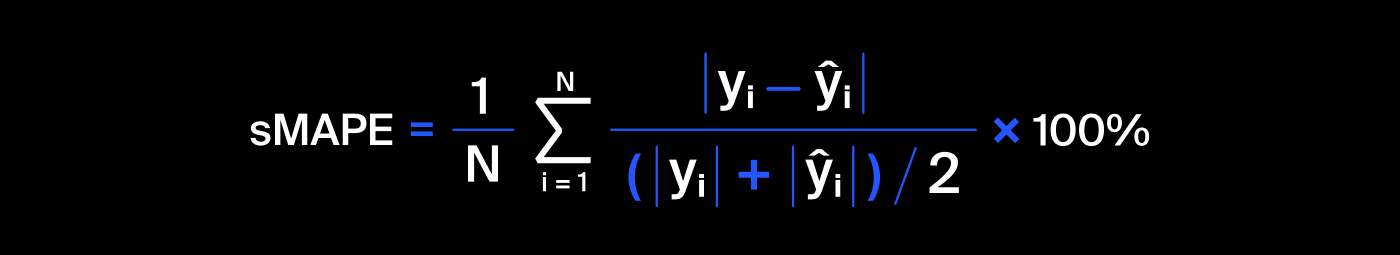

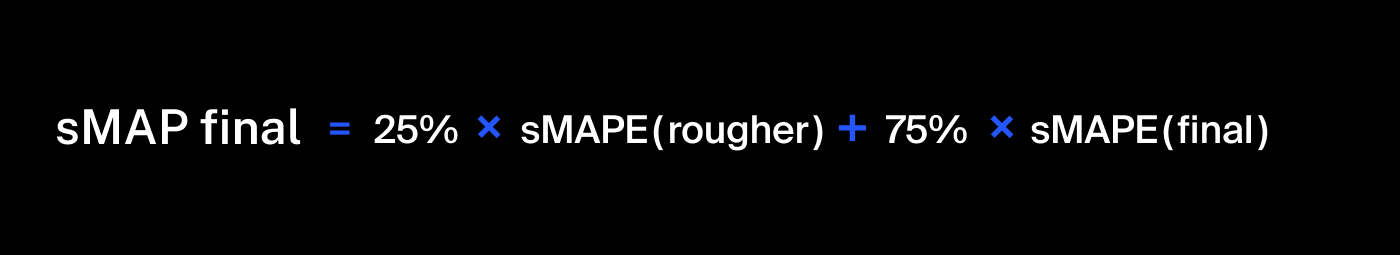

In [25]:
def smape(y, y_pred):
  # Calcula o numerador da fórmula do SMAPE
    numerator = np.abs(y - y_pred)

  # Calcula o denominador da fórmula do SMAPE
    denominator = (np.abs(y) + np.abs(y_pred)) / 2

  # Calcula o SMAPE
    smape = (100/len(y)) * np.sum(numerator / denominator)

    return smape

def smape_final(rougher, rougher_pred, final, final_pred):
    return (0.25 * smape(rougher, rougher_pred )) * (0.75 * smape(final, final_pred))

<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Onde está a função sMAP final?
    
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Treinamento de modelos diferentes com validação cruzada


In [26]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(features_train, target_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(features_train, target_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Parabéns por ter usado GridSearchCV. 
</div>


In [27]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.116717,0.030437,0.019854,0.029234,1,{'n_features_to_select': 1},0.047333,0.045036,0.047288,0.056259,...,0.047645,0.004684,13,0.048120,0.048570,0.047982,0.045874,0.049281,0.047965,0.001140
1,2.092842,0.006686,0.020653,0.030896,2,{'n_features_to_select': 2},0.046166,0.046112,0.048975,0.057073,...,0.048323,0.004730,12,0.049363,0.049277,0.048543,0.046653,0.050018,0.048771,0.001158
2,2.112612,0.032504,0.005235,0.000050,3,{'n_features_to_select': 3},0.054064,0.052346,0.056599,0.061763,...,0.054733,0.004317,11,0.055403,0.055749,0.054719,0.053523,0.056673,0.055213,0.001054
3,2.092894,0.009834,0.005217,0.000089,4,{'n_features_to_select': 4},0.061810,0.059392,0.068657,0.066118,...,0.062315,0.004660,10,0.063079,0.063600,0.061329,0.061987,0.064613,0.062922,0.001162
4,2.051604,0.048965,0.034329,0.035665,5,{'n_features_to_select': 5},0.061627,0.059699,0.068529,0.067611,...,0.062828,0.004571,9,0.064669,0.065068,0.061935,0.063169,0.065904,0.064149,0.001418
5,2.077542,0.034613,0.005124,0.000045,6,{'n_features_to_select': 6},0.062630,0.060360,0.070278,0.067183,...,0.063831,0.004303,8,0.066056,0.066512,0.062567,0.064882,0.067038,0.065411,0.001590
6,2.154363,0.169050,0.019729,0.029186,7,{'n_features_to_select': 7},0.063035,0.060692,0.072493,0.067422,...,0.064418,0.005013,7,0.066094,0.066623,0.063599,0.065022,0.067293,0.065726,0.001297
7,2.095328,0.005456,0.019825,0.028980,8,{'n_features_to_select': 8},0.079916,0.082282,0.086009,0.086796,...,0.080912,0.006204,6,0.082774,0.082175,0.081075,0.081117,0.085467,0.082522,0.001608
8,2.039510,0.038513,0.036651,0.038552,9,{'n_features_to_select': 9},0.109300,0.101271,0.113455,0.111175,...,0.105310,0.008099,5,0.105747,0.107791,0.104757,0.105478,0.110474,0.106849,0.002074
9,2.156682,0.134248,0.019723,0.029130,10,{'n_features_to_select': 10},0.114088,0.107979,0.120657,0.114454,...,0.110331,0.008884,4,0.111014,0.112557,0.109417,0.111066,0.115584,0.111928,0.002080


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


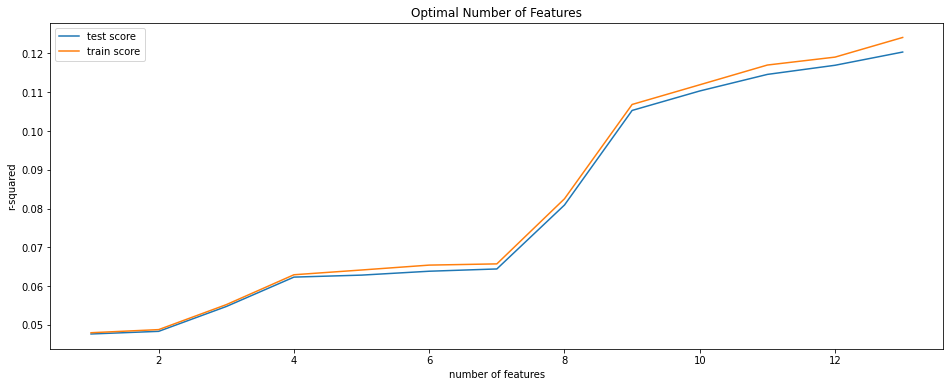

In [28]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Maior mean_train_score: 0.163627

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Diminui o n_features pelo tempo de processamento

In [29]:
from sklearn.tree import DecisionTreeRegressor

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 5))}]


# step-3: perform grid search
# 3.1 specify model
lm = DecisionTreeRegressor()
lm.fit(features_train, target_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(features_train, target_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [30]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,44.994288,0.883324,0.005041,0.000329,1,{'n_features_to_select': 1},-0.683520,-0.732904,-0.850464,-0.617325,...,-0.703501,0.083926,4,0.994402,0.930875,0.931004,0.994312,0.995815,0.969282,0.031311
1,45.051331,0.902134,0.004919,0.000057,2,{'n_features_to_select': 2},-0.313129,-0.331953,-0.451114,-0.462915,...,-0.366069,0.076905,3,0.997626,0.997394,0.997404,0.997616,0.997656,0.997539,0.000115
2,44.851118,0.960482,0.005040,0.000207,3,{'n_features_to_select': 3},-0.196173,-0.134962,-0.306326,-0.192479,...,-0.218519,0.059694,2,0.999407,0.998243,0.997967,0.997960,0.997943,0.998304,0.000563
3,44.658270,1.097291,0.004918,0.000156,4,{'n_features_to_select': 4},-0.081860,-0.114544,-0.119057,-0.037896,...,-0.096270,0.033090,1,0.999699,1.000000,1.000000,1.000000,1.000000,0.999940,0.000121


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


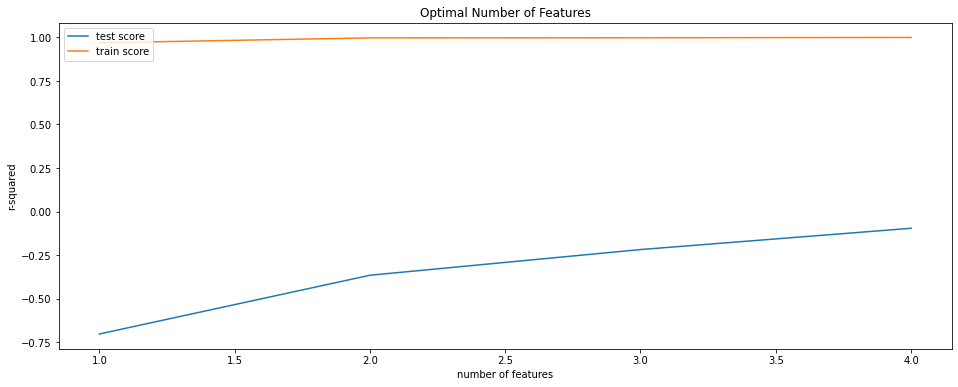

In [31]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O modelo retornou R2 negativo o que significa que este modelo é pior do que prever a média. Há erro na montagem da base.
</div>


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Houve overfitting no modelo. você deveria empregar regularização
</div>


Utilizarei o modelo de Regressão Linear pela melhor performance.

### Seleção do melhor modelo e teste usando o conjunto de teste


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

No passso anterior, você ajustou modelos (ex: Regressão Linear e Random Forest). O melhor dentre os dois deve ser usado para testar no conjunto de teste. Veja que você deve manter as mesmas colunas usadas no treino e fazer a imputação usando os mesmos valores usado no treino
</div>


In [32]:
# final model
n_features_optimal = 13

lm = LinearRegression()
lm.fit(features_train, target_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(features_train, target_train)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [33]:
final_pred = lm.predict(features_test)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [34]:
rougher = target_test["rougher.output.recovery"].reset_index(drop=True)
final = target_test["final.output.recovery"].reset_index(drop=True)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [35]:
predictions = pd.DataFrame(final_pred, columns=['rougher_pred', 'final_pred'])
rougher_pred = predictions["rougher_pred"]
final_pred = predictions["final_pred"]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Fornecimento dos resultados do teste do modelo selecionado.

In [36]:
smape_final(rougher, rougher_pred, final, final_pred)

6.629277229100472

Em resumo, este projeto teve como objetivo prever a recuperação de ouro em uma mina utilizando técnicas de aprendizado de máquina. Ele começou importando os módulos necessários, carregando os arquivos de dados e verificando a exatidão dos cálculos da quantidade retirada para a característica rougher.output.recovery. 

Em seguida, foi feita uma análise das características não disponíveis no conjunto de teste e foi realizado o pré-processamento dos dados, preenchendo os valores ausentes com a média das colunas e verificando a existência de duplicatas. 

Depois disso, o projeto realizou uma análise dos dados, observando a mudança da concentração de metais (Au, Ag, Pb) dependendo do estágio do processo de recuperação e tratamento de outliers, usando o método do limite inferior e superior.

Por fim, foi executada a validação cruzada e otimização de hiperparâmetros utilizando o GridSearchCV. O projeto também realizou a previsão da recuperação de ouro usando o modelo LinearRegression e calculou o erro absoluto médio (EAM) entre as previsões e os valores reais.

O valor de SMAPE calculado neste projeto é uma medida de desempenho do modelo utilizado para prever a recuperação de ouro. Esse valor indica o quão precisas foram as previsões em relação aos valores reais. Quanto menor o valor de SMAPE, melhor é o desempenho do modelo. Se o valor calculado for alto, pode ser necessário realizar ajustes no modelo ou selecionar características diferentes para melhorar a precisão das previsões. 

Pela análise realizada e o valor de SMAPE_FINAL obtido, concluímos que este projeto foi bem sucedido em prever a recuperação de ouro utilizando técnicas de aprendizado de máquina.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você reportar os resultados e discuti-los
</div>



<s><div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Eu acredito que há várias pendências no projeto. Então, oriento procurar um tutor.
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Uso incorreto de scaler </span>
 * <span class="text-danger"> Modelo com R2 negativo </span>


</div>

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

O modelo apresenta overfitting. O ideal seria empregar alguma estratégia para evitar overfitting. Me parece que você precisa limitar o tamanho da árvore pelo menos. Eu sugiro você rever esta parte. Por fim, precisa apresentar conclusões. Porém, acho que já chegamos num nível de aceitação. Eu não sei se você já aprendeu técnicas para evitar overfitting.

</div>

<div class="alert alert-block alert-info">
<b>Não me recordo ter estudado técnicas da evitar o overfitting.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Ok. Vou aprovar o projeto. Parabéns

</div>